# 1)Data collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2

### Read the Data Table

In [2]:
dataset = pd.read_csv(r"D:\DSA\week11\elec_final.csv")
dataset.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,376892,482,377374,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,318665,149,318814,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,314057,181,314238,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,644459,2416,646875,1937690


- The data is about the 2019 India general election candidates and the votes obatined

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2261
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2018 non-null   int64  
 1   CONSTITUENCY    2018 non-null   int64  
 2   NAME            2018 non-null   int64  
 3   WINNER          2018 non-null   int64  
 4   PARTY           2018 non-null   int64  
 5   SYMBOL          2018 non-null   int32  
 6   GENDER          2018 non-null   int32  
 7   CRIMINAL_CASES  2018 non-null   int32  
 8   AGE             2018 non-null   float64
 9   CATEGORY        2018 non-null   int32  
 10  EDUCATION       2018 non-null   int64  
 11  GENERAL_VOTES   2018 non-null   int64  
 12  POSTAL_VOTES    2018 non-null   float64
 13  TOTAL_VOTES     2018 non-null   int64  
 14  TOTAL_ELECTORS  2018 non-null   float64
dtypes: float64(3), int32(4), int64(8)
memory usage: 285.3 KB


### Renaming invalid column names

- fixing the incorrect column names and replace all the spaces in column names with underscores (‘_’) for easy data manipulation in the later stages

In [40]:
dataset = dataset.rename(columns={'CRIMINAL\nCASES': 'CRIMINAL_CASES', 'GENERAL\nVOTES': 'GENERAL_VOTES', 'POSTAL\nVOTES': 'POSTAL_VOTES', 'TOTAL\nVOTES': 'TOTAL_VOTES','TOTAL ELECTORS': 'TOTAL_ELECTORS'})

In [41]:
dataset.describe()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,TOTAL_ELECTORS
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2.018000e+03,2018.000000,2.018000e+03,2.018000e+03
mean,20.216056,274.144698,1006.072349,0.267096,49.656591,60.872646,0.872151,1.453915,52.273538,0.430624,5.731417,2.911903e+05,769.346383,2.922954e+05,1.685640e+06
std,11.387435,157.676683,581.662987,0.442553,29.798173,25.868056,0.334005,7.636973,11.869373,0.697324,3.785421,2.545964e+05,891.360334,2.555874e+05,1.961855e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,1.339000e+03,0.000000,1.342000e+03,1.195720e+06
25%,11.000000,135.000000,502.250000,0.000000,26.000000,48.000000,1.000000,0.000000,43.250000,0.000000,3.000000,3.047625e+04,97.000000,3.074375e+04,1.562283e+06
50%,19.000000,279.000000,1006.500000,0.000000,46.000000,66.000000,1.000000,0.000000,52.000000,0.000000,5.000000,2.846300e+05,462.500000,2.855250e+05,1.679891e+06
75%,31.000000,413.750000,1510.750000,1.000000,47.000000,80.000000,1.000000,1.000000,61.000000,1.000000,10.000000,5.058620e+05,1173.750000,5.076175e+05,1.809027e+06
max,35.000000,538.000000,2012.000000,1.000000,131.000000,125.000000,1.000000,240.000000,86.000000,2.000000,12.000000,1.066824e+06,3706.000000,1.068569e+06,2.253448e+06


# 2)Pre-processing

### Checking for missing values

In [42]:
dataset.isna().sum()

STATE             0
CONSTITUENCY      0
NAME              0
WINNER            0
PARTY             0
SYMBOL            0
GENDER            0
CRIMINAL_CASES    0
AGE               0
CATEGORY          0
EDUCATION         0
GENERAL_VOTES     0
POSTAL_VOTES      0
TOTAL_VOTES       0
TOTAL_ELECTORS    0
dtype: int64

- Almost 10 percentage of the data seems missing

### Some data cleaning and manipulation

- Drop rows with NA values

In [43]:
dataset = dataset[dataset['GENDER'].notna()]

### Replacing Nil values with 0

In [44]:
dataset['CRIMINAL_CASES'] = dataset['CRIMINAL_CASES'].replace(['Not Available'], '0')

- Cleaning column values. removing unwanted symbols and new line charachters from the table

In [45]:
dataset['CRIMINAL_CASES'] = dataset['CRIMINAL_CASES'].astype(str).astype(int)

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2261
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2018 non-null   int64  
 1   CONSTITUENCY    2018 non-null   int64  
 2   NAME            2018 non-null   int64  
 3   WINNER          2018 non-null   int64  
 4   PARTY           2018 non-null   int64  
 5   SYMBOL          2018 non-null   int32  
 6   GENDER          2018 non-null   int32  
 7   CRIMINAL_CASES  2018 non-null   int32  
 8   AGE             2018 non-null   float64
 9   CATEGORY        2018 non-null   int32  
 10  EDUCATION       2018 non-null   int64  
 11  GENERAL_VOTES   2018 non-null   int64  
 12  POSTAL_VOTES    2018 non-null   float64
 13  TOTAL_VOTES     2018 non-null   int64  
 14  TOTAL_ELECTORS  2018 non-null   float64
dtypes: float64(3), int32(4), int64(8)
memory usage: 220.7 KB


In [47]:
dataset.isna().sum()

STATE             0
CONSTITUENCY      0
NAME              0
WINNER            0
PARTY             0
SYMBOL            0
GENDER            0
CRIMINAL_CASES    0
AGE               0
CATEGORY          0
EDUCATION         0
GENERAL_VOTES     0
POSTAL_VOTES      0
TOTAL_VOTES       0
TOTAL_ELECTORS    0
dtype: int64

In [48]:
dataset.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,TOTAL_ELECTORS
0,31,0,1712,1,26,80,1,52,52.0,2,1,376892,482.0,377374,1489790.0
1,31,0,700,0,119,32,1,0,54.0,2,11,318665,149.0,318814,1489790.0
2,31,0,1497,0,46,66,1,3,52.0,2,1,314057,181.0,314238,1489790.0
4,33,1,1788,1,26,80,1,5,58.0,1,4,644459,2416.0,646875,1937690.0
5,33,1,1118,0,35,49,1,0,47.0,1,11,434199,1130.0,435329,1937690.0


- The data set is somewhat better than the raw form. we filled missing values and cleaned it for further analysis

### Outliers detection and handling


#### a)AGE

Text(0.5, 1.0, 'Boxplot of Age')

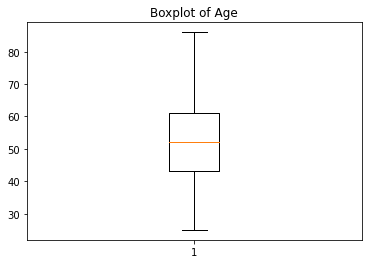

In [49]:
plt.boxplot(dataset["AGE"])
plt.title("Boxplot of Age")

There is no outliers

#### b)TOTAL_ELECTORS

Text(0.5, 1.0, 'Boxplot of TOTAL_ELECTORS')

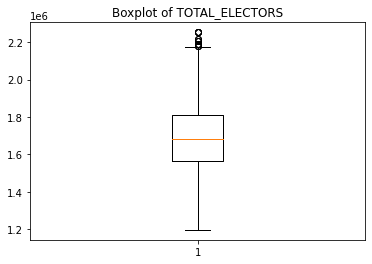

In [50]:
plt.boxplot(dataset["TOTAL_ELECTORS"])
plt.title("Boxplot of TOTAL_ELECTORS")

In [51]:
Q1=np.percentile(dataset["TOTAL_ELECTORS"],25,interpolation="midpoint")
Q2=np.percentile(dataset["TOTAL_ELECTORS"],50,interpolation="midpoint")
Q3=np.percentile(dataset["TOTAL_ELECTORS"],75,interpolation="midpoint")
print(Q1,Q2,Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
outlier=[]
for x in dataset["TOTAL_ELECTORS"]:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x) 
outlier        

1562283.0 1679891.0 1808944.5


[2204817.0,
 2204817.0,
 2204817.0,
 2215489.0,
 2215489.0,
 2181319.0,
 2181319.0,
 2181319.0,
 2253448.0,
 2253448.0,
 2253448.0,
 2253448.0,
 2253448.0,
 2191465.0,
 2191465.0,
 2191465.0]

In [52]:
median=float(np.median(dataset["TOTAL_ELECTORS"]))
for i in outlier:
    dataset.loc[dataset["TOTAL_ELECTORS"]==i,"TOTAL_ELECTORS"]=np.nan
dataset["TOTAL_ELECTORS"].fillna(median,inplace=True)

Text(0.5, 1.0, 'Boxplot of TOTAL_ELECTORS')

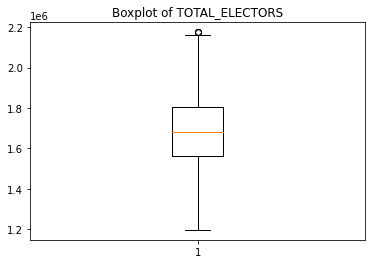

In [53]:
plt.boxplot(dataset["TOTAL_ELECTORS"])
plt.title("Boxplot of TOTAL_ELECTORS")

#### c)POSTAL_VOTES

Text(0.5, 1.0, 'Boxplot of POSTAL_VOTES ')

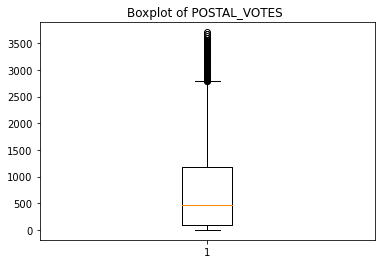

In [54]:
plt.boxplot(dataset["POSTAL_VOTES"])
plt.title("Boxplot of POSTAL_VOTES ")

In [55]:
Q1=np.percentile(dataset["POSTAL_VOTES"],25,interpolation="midpoint")
Q2=np.percentile(dataset["POSTAL_VOTES"],50,interpolation="midpoint")
Q3=np.percentile(dataset["POSTAL_VOTES"],75,interpolation="midpoint")
print(Q1,Q2,Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
outlier=[]
for x in dataset["POSTAL_VOTES"]:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x) 
outlier        

97.0 462.5 1172.5


[3381.0,
 3679.0,
 2967.0,
 3016.0,
 3436.0,
 3103.0,
 3447.0,
 3016.0,
 3183.0,
 3557.0,
 2976.0,
 3243.0,
 3187.0,
 3458.0,
 3117.0,
 3009.0,
 3547.0,
 3167.0,
 3380.0,
 3043.0,
 2973.0,
 2996.0,
 3409.0,
 2960.0,
 2852.0,
 3252.0,
 2831.0,
 3027.0,
 2985.0,
 3222.0,
 3494.0,
 3265.0,
 3528.0,
 3502.0,
 3110.0,
 3194.0,
 2873.0,
 3000.0,
 2920.0,
 3338.0,
 3071.0,
 3017.0,
 3074.0,
 3210.0,
 3643.0,
 3396.0,
 2860.0,
 2975.0,
 3531.0,
 3364.0,
 2857.0,
 2900.0,
 2815.0,
 3364.0,
 3410.0,
 3329.0,
 2815.0,
 3406.0,
 3324.0,
 2866.0,
 3123.0,
 2923.0,
 2829.0,
 2839.0,
 3447.0,
 3559.0,
 3208.0,
 3243.0,
 2804.0,
 3296.0,
 2923.0,
 3309.0,
 2878.0,
 2971.0,
 3000.0,
 3555.0,
 3325.0,
 3706.0,
 3553.0,
 3349.0,
 3486.0,
 3174.0,
 3000.0,
 3311.0,
 2944.0,
 2885.0,
 2994.0,
 2948.0,
 2837.0,
 3235.0,
 3371.0,
 3179.0,
 3676.0,
 2797.0,
 3199.0,
 2798.0,
 2932.0,
 3511.0,
 2831.0,
 2814.0,
 2910.0,
 2938.0,
 3075.0,
 2876.0,
 3590.0]

In [56]:
median=float(np.median(dataset["POSTAL_VOTES"]))
for i in outlier:
    dataset.loc[dataset["POSTAL_VOTES"]==i,"POSTAL_VOTES"]=np.nan
dataset["POSTAL_VOTES"].fillna(median,inplace=True)

Text(0.5, 1.0, 'Boxplot of POSTAL_VOTES ')

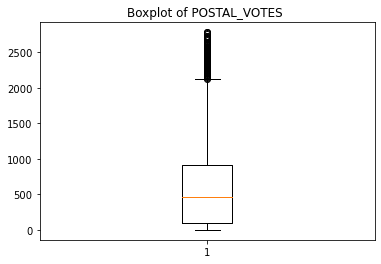

In [57]:
plt.boxplot(dataset["POSTAL_VOTES"])
plt.title("Boxplot of POSTAL_VOTES ")

#### d)GENERAL_VOTES

Text(0.5, 1.0, 'Boxplot of GENERAL_VOTES ')

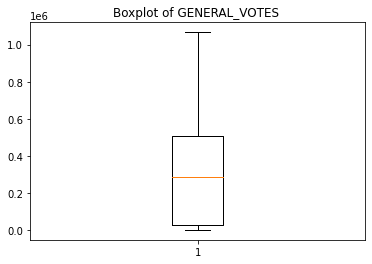

In [58]:
plt.boxplot(dataset["GENERAL_VOTES"])
plt.title("Boxplot of GENERAL_VOTES ")

There is no outliers are present

### Encoding

- encoding the non-numerical columns to numerical columns using sklearn LabelEncoder.

In [59]:
lblEncoder_symbol = LabelEncoder()
lblEncoder_symbol.fit(dataset['SYMBOL'])
dataset['SYMBOL'] = lblEncoder_symbol.transform(dataset['SYMBOL'])

lblEncoder_gender = LabelEncoder()
lblEncoder_gender.fit(dataset['GENDER'])
dataset['GENDER'] = lblEncoder_gender.transform(dataset['GENDER'])

lblEncoder_category = LabelEncoder()
lblEncoder_category.fit(dataset['CATEGORY'])
dataset['CATEGORY'] = lblEncoder_category.transform(dataset['CATEGORY'])

In [60]:
dataset.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,TOTAL_ELECTORS
0,31,0,1712,1,26,80,1,52,52.0,2,1,376892,482.0,377374,1489790.0
1,31,0,700,0,119,32,1,0,54.0,2,11,318665,149.0,318814,1489790.0
2,31,0,1497,0,46,66,1,3,52.0,2,1,314057,181.0,314238,1489790.0
4,33,1,1788,1,26,80,1,5,58.0,1,4,644459,2416.0,646875,1937690.0
5,33,1,1118,0,35,49,1,0,47.0,1,11,434199,1130.0,435329,1937690.0


# 3)Exploratory Data Analysis


### a)Univariant Analysis

[Text(0, 0, '1760'), Text(0, 0, '258')]

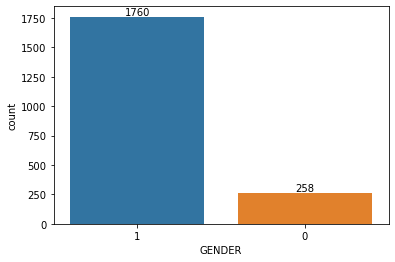

In [61]:
data1=sns.countplot(x=dataset["GENDER"],order=dataset['GENDER'].value_counts(ascending=False).index);
values = dataset['GENDER'].value_counts(ascending=False).values
data1.bar_label(container=data1.containers[0], labels=values)

                            *Total number of Male = 1760
                            *Total number of Female = 258

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '11'),
  Text(1, 0, '5'),
  Text(2, 0, '6'),
  Text(3, 0, '1'),
  Text(4, 0, '0'),
  Text(5, 0, '3'),
  Text(6, 0, '4'),
  Text(7, 0, '10'),
  Text(8, 0, '8'),
  Text(9, 0, '2'),
  Text(10, 0, '9'),
  Text(11, 0, '7'),
  Text(12, 0, '12')])

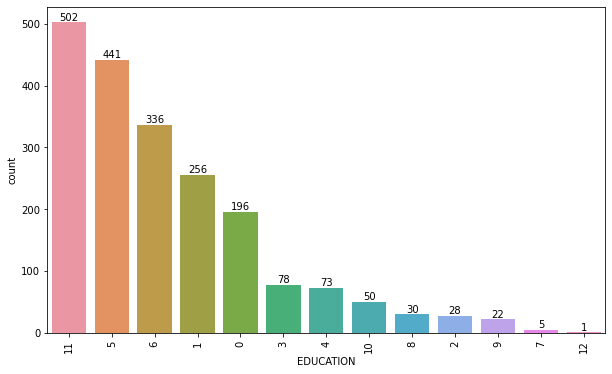

In [62]:
plt.figure(figsize=(10,6))
data1=sns.countplot(x=dataset["EDUCATION"],order=dataset['EDUCATION'].value_counts(ascending=False).index);
values = dataset['EDUCATION'].value_counts(ascending=False).values
data1.bar_label(container=data1.containers[0], labels=values)
plt.xticks(rotation=90)

### b)Bivariant Analysis

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

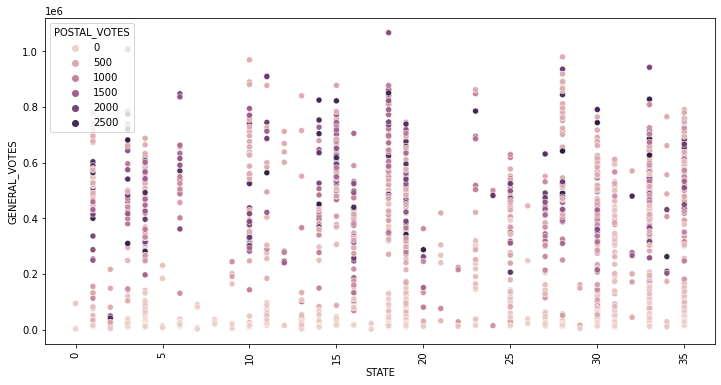

In [63]:
plt.figure(figsize=(12,6))
sns.scatterplot(dataset["STATE"],dataset["GENERAL_VOTES"],dataset["POSTAL_VOTES"])
plt.xticks(rotation=90)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

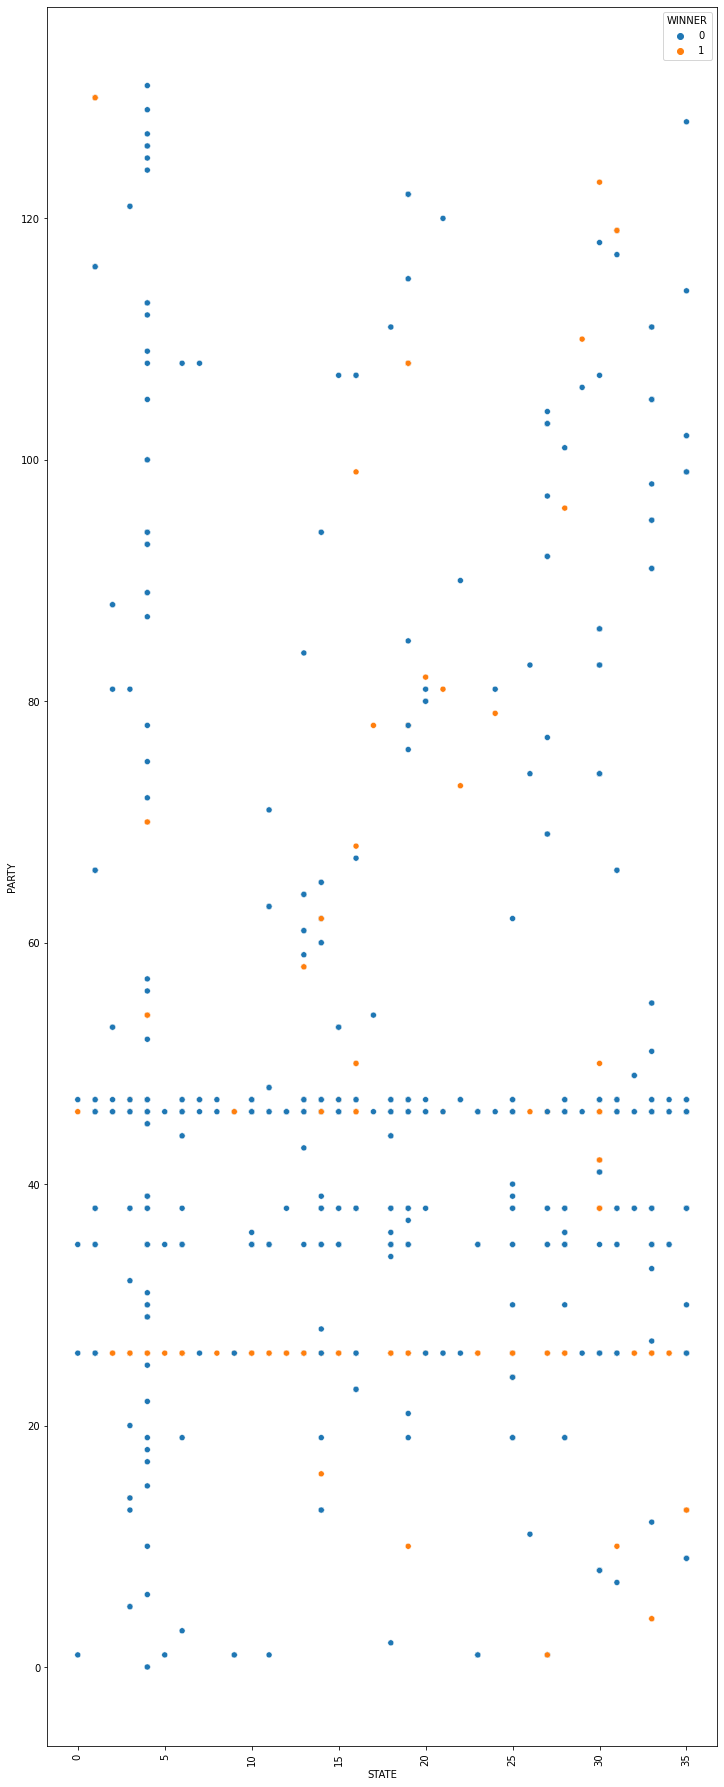

In [64]:
plt.figure(figsize=(12,32))
sns.scatterplot(dataset["STATE"],dataset["PARTY"],dataset["WINNER"])
plt.xticks(rotation=90)

# 4)Modelling

- K-Nearest Neighbors model is created and tested for its accuracy. KNN is a supervised machine learning model which is categorized under classification algorithms.

In [65]:
lblEncoder_category = LabelEncoder()
lblEncoder_category.fit(dataset['STATE'])
dataset['STATE'] = lblEncoder_category.transform(dataset['STATE'])

lblEncoder_symbol = LabelEncoder()
lblEncoder_symbol.fit(dataset['EDUCATION'])
dataset['EDUCATION'] = lblEncoder_symbol.transform(dataset['EDUCATION'])

lblEncoder_symbol = LabelEncoder()
lblEncoder_symbol.fit(dataset['NAME'])
dataset['NAME'] = lblEncoder_symbol.transform(dataset['NAME'])

lblEncoder_category = LabelEncoder()
lblEncoder_category.fit(dataset['CONSTITUENCY'])
dataset['CONSTITUENCY'] = lblEncoder_category.transform(dataset['CONSTITUENCY'])

lblEncoder_category = LabelEncoder()
lblEncoder_category.fit(dataset['PARTY'])
dataset['PARTY'] = lblEncoder_category.transform(dataset['PARTY'])


In [66]:
y = dataset["WINNER"]
X = dataset.drop(labels=["WINNER"], axis=1)

# splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### a)KNN

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

y = dataset["WINNER"]
X = dataset.drop(labels=["WINNER"], axis=1)

# splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# train and test knn model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.8960396039603961
F - score of the model:  0.8657084968975561
Precision score of the model:  0.8703205128205128
Recall score of the model:  0.861423923923924
Confuion Matrix 
 [[277  19]
 [ 23  85]]


### b)Logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression
logic_model=LogisticRegression()
logic_model.fit(X_train,y_train)
y_pred=logic_model.predict(X_test)

print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.8960396039603961
F - score of the model:  0.8657084968975561
Precision score of the model:  0.8703205128205128
Recall score of the model:  0.861423923923924
Confuion Matrix 
 [[277  19]
 [ 23  85]]


### c)Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.8985148514851485
F - score of the model:  0.8700811796541041
Precision score of the model:  0.871188520721231
Recall score of the model:  0.868993993993994
Confuion Matrix 
 [[276  20]
 [ 21  87]]


More accuracy in Random Forest tree

# 5)Fine tuning the model

- To improve the model accuracy, we are using a normalisation method. we are using MinMaxScaler from the scikit-learn library to scale down all the values into the 0–1 range.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
features = [
    'STATE', 'CONSTITUENCY', 'NAME', 'PARTY', 'SYMBOL', 'GENDER', 'CRIMINAL_CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'GENERAL_VOTES', 'POSTAL_VOTES', 'TOTAL_VOTES', 'TOTAL_ELECTORS']
dataset[features] = scaler.fit_transform(dataset[features])

In [72]:
y = dataset["WINNER"]
X = dataset.drop(labels=["WINNER"], axis=1)

# splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# train and test knn model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.predict(X_test)
print("Testing Accuracy is: ", knn.score(X_test, y_test)*100, "%2")

Testing Accuracy is:  88.61386138613861 %2


- The test after normalisation shows an accuracy of 88.6%